# **KAU Deep Learning (Spring 2025)**

**NOTE**
Some descriptions & codes from the below resources:

1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.python-course.eu/machine_learning_data_visualization.php
3. http://yann.lecun.com/exdb/mnist/
4. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
5. https://pytorch.org/vision/0.8/transforms.html
6. https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel
7. https://colab.research.google.com/github/jigsawlabs-student/pytorch-intro-curriculum/blob/main/5-training-mathematically/20-backpropagation-and-gradient-descent.ipynb#scrollTo=inner-light
---

## Deep learning framework tutorial

####**Pytorch?**

PyTorch is an **open-source machine learning library** developed by Facebook. It provides tensor computation with strong GPU acceleration and automatic differentiation, **allowing for easy implementation and training of machine learning models**. PyTorch operates in Python and provides an **interface similar to Numpy**, making it easy to manipulate and process data. Additionally, PyTorch offers an intuitive and flexible way to build models using dynamic computation graphs, which is more **intuitive and flexible** than the static graph approach used by TensorFlow. PyTorch is **one of the most popular deep learning** libraries in recent years, and has a vibrant community supporting it.

###1. Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

**Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays**, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and
NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors
are also optimized for automatic differentiation. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API.


#### ReCap: Tensor?
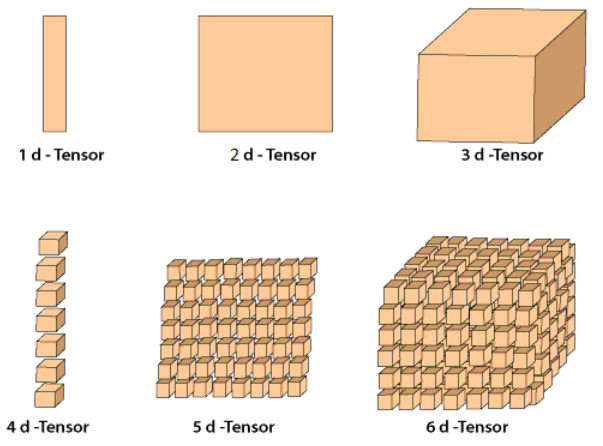

In [ ]:
import torch
import numpy as np

#### 1.1 Initializing a Tensor



In [ ]:
# from list
data = [[1, 2],[3, 4]] # list
x_data = torch.tensor(data)
print(f"Tensor from list : \n {x_data} \n")

# from Numpy
np_array = np.array(data) # array
x_np = torch.from_numpy(np_array)
print(f"Tensor from list : \n {x_np} \n")

Tensor from list : 
 tensor([[1, 2],
        [3, 4]]) 

Tensor from list : 
 tensor([[1, 2],
        [3, 4]]) 



In [ ]:
# With random or constant values
shape = (2,3)
rand_tensor = torch.rand((2,3))
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")


# From another tensor
x_ones = torch.ones_like(rand_tensor)   # x_ones = np.array_like(x)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(rand_tensor)
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.2639, 0.4521, 0.2871],
        [0.6038, 0.1722, 0.1860]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Random Tensor: 
 tensor([[0.0422, 0.8377, 0.6722],
        [0.0023, 0.8110, 0.3241]]) 



#### 1.2 Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




#### 1.3 Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described [here](https://pytorch.org/docs/stable/torch.html)_.

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!

If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU


In [ ]:
# We move our tensor to the GPU if available
tensor = torch.rand(3,4)
print(tensor.device)

if torch.cuda.is_available():
    tensor = tensor.to("cuda")
print(tensor.device)

cpu
cpu


Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




Basically, operator operations and slicing are the same as in numpy.


In [ ]:
## Slicing
tensor = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:,3]}")
print(f"Last column: {tensor[..., -1]}")

print("-"*30)

## Operator
tensor1 = torch.rand(2,2)
tensor2 = torch.rand(2,2)
tensor3 = torch.rand(1,2)
print("tensor1 : \n",tensor1)
print("tensor2 : \n",tensor2)
print("tensor3 : \n",tensor3)
print("-"*30)
print("sum : \n",tensor1 + tensor2)
print("broadcasting : \n",tensor1 + tensor3) # broadcasting
print("square operation : \n",tensor1**2)
print("Matrix multiply : \n",tensor1@tensor2)

First row: tensor([1, 2, 3, 4])
First column: tensor([ 4,  8, 12, 16])
Last column: tensor([ 4,  8, 12, 16])
------------------------------
tensor1 : 
 tensor([[0.6519, 0.2183],
        [0.9155, 0.8459]])
tensor2 : 
 tensor([[0.0183, 0.7840],
        [0.6308, 0.5074]])
tensor3 : 
 tensor([[0.3219, 0.4573]])
------------------------------
sum : 
 tensor([[0.6702, 1.0023],
        [1.5464, 1.3532]])
broadcasting : 
 tensor([[0.9738, 0.6756],
        [1.2374, 1.3032]])
square operation : 
 tensor([[0.4250, 0.0476],
        [0.8382, 0.7155]])
Matrix multiply : 
 tensor([[0.1496, 0.6218],
        [0.5504, 1.1470]])


However, there may be some APIs in PyTorch that have the same functionality as in NumPy but with different names(case 1), or have the same name but different functionality(case 2). In such cases, it is important to refer to the PyTorch documentation to ensure the correct usage of the API you want to use.

In [ ]:
data = [1,2,3,4]
array = np.asarray(data) ## numpy array
tensor = torch.Tensor(data) ## pytorch tensor

## case 1 example
print("numpy reshape : \n ",array.reshape(2,2))
print("pytorch view : \n ",tensor.view(2,2))

print("-"*30)

## case 2 example
print("numpy repeat : \n", array.repeat(3))
print("pytorch repeat : \n", tensor.repeat(3)) ## cf) tensor.tile has similar functionality with array.repeat

numpy reshape : 
  [[1 2]
 [3 4]]
pytorch view : 
  tensor([[1., 2.],
        [3., 4.]])
------------------------------
numpy repeat : 
 [1 1 1 2 2 2 3 3 3 4 4 4]
pytorch repeat : 
 tensor([1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4.])


### 2. Get the data


#### 2.1 A collection of ready-to-use datasets (built-in dataset)

##### 2.1.1 (Example 1) The IRIS dataset (built-in dataset in scikit learn)
> Data Set Information:
>
> This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
>
> Predicted attribute: class of iris plant.
>
> This is an exceedingly simple domain.
>
> This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

(from http://archive.ics.uci.edu/ml/datasets/Iris)

In [ ]:
from sklearn import datasets

# Ths Iris dataset
iris = datasets.load_iris()

# The resulting dataset is a Bunch object:
print(type(iris))

# You can see what's available for this data type by using the method keys():
print(iris.keys())
# A Bunch object is similar to a dicitionary, but it additionally allows accessing the keys in an attribute style:
print(iris.target_names)

# The information about the class of each sample, i.e. the labels, is stored in the "target" attribute of the data set:
print(iris.data.shape)
print(iris.target.shape)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


##### 2.1.2 (Example) MNIST Handwritten Digit Classification Dataset (built-in dataset in Pytorch)

> Data Set Information:
>
> The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST.
>
> It is grayscale images of handwritten single digits between 0 and 9.
>
> The images have been size-normalized and centered in a fixed-size (28 x 28)
>
> The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.


60000 10000
Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train


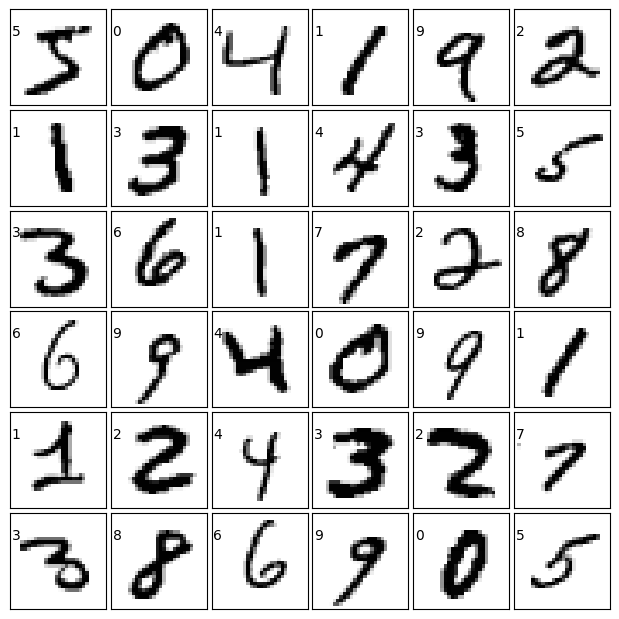

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST ## load MNIST dataset from torchvision--torchvision은 영상에 관련된 데이터가 있는 클래스이다
import numpy as np
import matplotlib.pyplot as plt

train_dataset = MNIST(root='data/', download=True)
test_dataset = MNIST(root='data/', train=False)

print(len(train_dataset), len(test_dataset)) # training set 60000, test 10000
print(train_dataset)

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[]) #xticks=[], yticks=[] to remove ticks in the figure
    image = np.asarray(train_dataset[i][0])
    target = train_dataset[i][1]
    ax.imshow(image, cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(target))

#### 2.2 Loading CSV Files

California Housing
---

Source
This dataset is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled *Sparse Spatial Autoregressions* by Pace, R. Kelley and Ronald Barry, published in the *Statistics and Probability Letters* journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

---
#### Tweaks
The dataset in this directory is almost identical to the original, with two differences:

* 207 values were randomly removed from the `total_bedrooms` column, so we can discuss what to do with missing data.
* An additional categorical attribute called `ocean_proximity` was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.

Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing.

#### Data description

    >>> housing.info()
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20640 entries, 0 to 20639
    Data columns (total 10 columns):
    longitude             20640 non-null float64
    latitude              20640 non-null float64
    housing_median_age    20640 non-null float64
    total_rooms           20640 non-null float64
    total_bedrooms        20433 non-null float64
    population            20640 non-null float64
    households            20640 non-null float64
    median_income         20640 non-null float64
    median_house_value    20640 non-null float64
    ocean_proximity       20640 non-null object
    dtypes: float64(9), object(1)
    memory usage: 1.6+ MB
    
    >>> housing["ocean_proximity"].value_counts()
    <1H OCEAN     9136
    INLAND        6551
    NEAR OCEAN    2658
    NEAR BAY      2290
    ISLAND           5
    Name: ocean_proximity, dtype: int64
    
    >>> housing.describe()
              longitude      latitude  housing_median_age   total_rooms  \
    count  16513.000000  16513.000000        16513.000000  16513.000000   
    mean    -119.575972     35.639693           28.652335   2622.347605   
    std        2.002048      2.138279           12.576306   2138.559393   
    min     -124.350000     32.540000            1.000000      6.000000   
    25%     -121.800000     33.940000           18.000000   1442.000000   
    50%     -118.510000     34.260000           29.000000   2119.000000   
    75%     -118.010000     37.720000           37.000000   3141.000000   
    max     -114.310000     41.950000           52.000000  39320.000000   

           total_bedrooms    population    households  median_income  
    count    16355.000000  16513.000000  16513.000000   16513.000000  
    mean       534.885112   1419.525465    496.975050       3.875651  
    std        412.716467   1115.715084    375.737945       1.905088  
    min          2.000000      3.000000      2.000000       0.499900  
    25%        295.000000    784.000000    278.000000       2.566800  
    50%        433.000000   1164.000000    408.000000       3.541400  
    75%        644.000000   1718.000000    602.000000       4.745000  
    max       6210.000000  35682.000000   5358.000000      15.000100


##### 2.2.1 From a local drive

To upload from your local drive, start with the following code:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
!ls -al
!pwd

total 1412
drwxr-xr-x 1 root root    4096 Apr 10 04:41 .
drwxr-xr-x 1 root root    4096 Apr 10 04:37 ..
drwxr-xr-x 4 root root    4096 Apr  7 13:42 .config
drwxr-xr-x 3 root root    4096 Apr 10 04:39 data
-rw-r--r-- 1 root root 1423529 Apr 10 04:41 housing.csv
drwxr-xr-x 1 root root    4096 Apr  7 13:43 sample_data
/content


In [ ]:
import os
import pandas as pd

HOUSING_PATH = "/content"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head() # The head() function is used to get the first n rows. # DataFrame.head(self, n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 2.2.2 From Google Drive

The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there.

This only supports reading, writing, and moving files; to programmatically modify sharing settings or other metadata, use one of the other options below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

HOUSING_PATH = "/content/drive/MyDrive/Colab Notebooks/2025_1 딥러닝"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 2.3 DataLoader & Custom Dataset (PyTorch)

Code for processing data samples can get **messy and hard to maintain**;

We ideally want our dataset code to be decoupled from our model training code for better readability and modularity.

PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data.

**Dataset stores the samples and their corresponding labels**
**DataLoader wraps an iterable around the Dataset to enable easy access to the samples**

###### 2.3.1 Dataloader (Pytorch)

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.

All datasets are subclasses of **torch.utils.data.Dataset** i.e, they have __getitem__ and __len__ methods implemented. Hence, they can all be passed to a torch.utils.data.DataLoader which can load multiple samples in parallel using torch.multiprocessing workers. For example:

https://pytorch.org/vision/stable/datasets.html


###### 2.3.2 Custom Dataset Fundamentals
(The below information from https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel)

Loading a custom dataset without dataloader

Before learning a datasloader, your PyTorch script probably looked like this:
```python
# Load entire dataset
X, y = torch.load('some_training_set_with_labels.pt')

# Train model
for epoch in range(max_epochs):
    for i in range(n_batches):
        # Local batches and labels
        local_X, local_y = X[i*n_batches:(i+1)*n_batches,], y[i*n_batches:(i+1)*n_batches,]

        # Your model
        [...]
```

This exercise is about optimizing the entire data generation process, so that it does not become a bottleneck in the training procedure.

From https://github.com/utkuozbulak/pytorch-custom-dataset-examples

The first and foremost part is creating a dataset class.

```python
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    def __init__(self, ...):
        # stuff
        
    def __getitem__(self, index):
        # stuff
        return (img, label)

    def __len__(self):
        return count # of how many examples(images?) you have
```

This is the skeleton that you have to fill to have a custom dataset. A dataset must contain following functions to be used by data loader later on.

* __init__() function is where the initial logic happens like reading a csv, assigning transforms, filtering data, etc.
* __getitem__() function returns the data and labels. This function is called from dataloader like this:

```python
img, label = MyCustomDataset.__getitem__(99)  # For 99th item
```

Here, MyCustomDataset returns two things, an image and a label but that does not mean that __getitem__() is only restricted to return those. Depending on your application you can return many things.

An important thing to note is that __getitem__() returns a specific type for a single data point (like a tensor, numpy array etc.), otherwise, in the data loader you will get an error like:

TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.PngImagePlugin.PngImageFile'>

* __len__() returns count of samples you have.

-----
###### Example

**Creating a dataset**

```python
import torch

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = torch.load('data/' + ID + '.pt')
        y = self.labels[ID]

        return X, y
```



**Example : Airplane Binary Classification Dataset**

This dataset is created from Cifar10(https://www.cs.toronto.edu/~kriz/cifar.html) and is used for image classification to determine whether an image is an airplane or not. It consists of a total of 10,000 train data and 2,000 test data, with airplane images labeled as 1 and no airplane images labeled as 0, evenly distributed in half of the dataset.

In [ ]:
import os
import zipfile
local_zip = "/content/drive/MyDrive/Colab Notebooks/2025_1 딥러닝/Airplane_binary_classification.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/dataset')
zip_ref.close()

In [ ]:
import pandas as pd
!ls -al /dataset
train_csv = pd.read_csv('/dataset/train_annotation.csv')
train_csv

total 356
drwxr-xr-x 4 root root   4096 Apr 17 07:41 .
drwxr-xr-x 1 root root   4096 Apr 17 07:41 ..
-rw-r--r-- 1 root root   1803 Apr 17 07:41 make_annotation.py
drwxr-xr-x 4 root root   4096 Apr 17 07:41 test
-rw-r--r-- 1 root root  55016 Apr 17 07:41 test_annotation.csv
drwxr-xr-x 4 root root   4096 Apr 17 07:41 train
-rw-r--r-- 1 root root 285016 Apr 17 07:41 train_annotation.csv


,filename,label
0,train/airplane/0001.png,1
1,train/airplane/0002.png,1
2,train/airplane/0003.png,1
3,train/airplane/0004.png,1
4,train/airplane/0005.png,1
...,...,...
9995,train/no_airplane/4996.png,0
9996,train/no_airplane/4997.png,0
9997,train/no_airplane/4998.png,0
9998,train/no_airplane/4999.png,0


First, implement a custom dataset to utilize the data.

In [ ]:
import torch
import pandas as pd
import os
from torchvision import transforms
import cv2

class AirplaneDataset(torch.utils.data.Dataset): ## make custom dataset
  def __init__(self, annotation_path, root_dir = '/dataset'): # root_dir : The parent directory path of the train and test directories.
        'Initialization'
        self.data_annotation = pd.read_csv(os.path.join(annotation_path))
        self.data_path = self.data_annotation['filename'] # filename이라는 열을 data_path에 할당
        self.labels = self.data_annotation['label'] # label이라는 열을 labels에 할당
        self.root_dir = root_dir
        self.to_tensor = transforms.ToTensor()

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.data_path)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        file_path = os.path.join(self.root_dir, self.data_path[index])
        input_image = cv2.imread(file_path) # 경로에 가서 이미지를 읽음
        input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB) # 색변경
        X = self.to_tensor(input_image)

        # Load data and get label
        y = torch.tensor(self.labels[index]).float()

        return X, y

Check the information about the dataset.

0th image data shape:  torch.Size([3, 32, 32])
0th label :  tensor(1.)


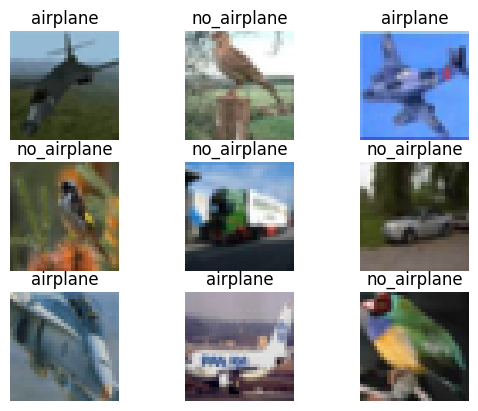

In [ ]:
import matplotlib.pyplot as plt
import random

## make by using custom dataset class
trainset = AirplaneDataset(annotation_path = '/dataset/train_annotation.csv')
testset = AirplaneDataset(annotation_path = '/dataset/test_annotation.csv')

print("0th image data shape: ", trainset[0][0].shape) ## 0th image data
print("0th label : ", trainset[0][1]) ## label

## visualize
class_names=['no_airplane','airplane']
for i in range(9):
  random_index = random.randint(1,10000)
  image, label = trainset[random_index]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image.permute(1,2,0).numpy())
  plt.title(class_names[int(label)])
  plt.axis("off")

**Load the created dataset using DataLoader**

* **batch_size**, which denotes the number of samples contained in each generated batch.
* **shuffle**. If set to True, we will get a new order of exploration at each pass (or just keep a linear exploration scheme otherwise). Shuffling the order in which examples are fed to the classifier is helpful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.
* **num_workers**, which denotes the number of processes that generate batches in parallel. A high enough number of workers assures that CPU computations are efficiently managed, i.e. that the bottleneck is indeed the neural network's forward and backward operations on the GPU (and not data generation).

```python
from my_classes import Dataset


# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}
max_epochs = 100

# Datasets
partition = # IDs
labels = # Labels

# Generators
training_set = Dataset(partition['train'], labels)
training_generator = torch.utils.data.DataLoader(training_set, **params)

validation_set = Dataset(partition['validation'], labels)
validation_generator = torch.utils.data.DataLoader(validation_set, **params)

# Loop over epochs
for epoch in range(max_epochs):
    # Training
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.to(device)

        # Model computations
        [...]

    # Validation
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.to(device)

            # Model computations
            [...]
```

Example.

In [ ]:
## parameters
epoch = 10
batchsize = 8
lr = 0.01 # learning rate
weight_decay = 1e-3

## dataloader
train_loader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batchsize,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(testset,
                                          batch_size=1,
                                          shuffle=True)

## make model and using GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleMLP().to(device)

## optimizer setting
optimizer = torch.optim.SGD(model.parameters(),
                            lr=lr,
                            weight_decay = weight_decay) # Stochastic Gradient Decent

## loss function
criterion = torch.nn.BCELoss() # Binary Cross Entropy

### 3. build model

#### Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data.
The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to
build your own neural network. Every module in PyTorch subclasses the [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
A neural network is a module itself that consists of other modules (layers). This nested structure allows for
building and managing complex architectures easily.

In the following sections, we'll build a neural network to classify images in the FashionMNIST dataset.


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

##### 3.1 Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU or MPS,
if available. Let's check to see if [torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html)
or [torch.backends.mps](https://pytorch.org/docs/stable/notes/mps.html) are available, otherwise we use the CPU.



In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


##### 3.2 Define the Class
We define our neural network by subclassing ``nn.Module``, and
initialize the neural network layers in ``__init__``. Every ``nn.Module`` subclass implements
the operations on input data in the ``forward`` method.



In [ ]:
# 여기를 수정하는 것이 제일 중요하다!!!!!
class SimpleMLP(nn.Module):
    def __init__(self): ## set layers
        super().__init__()
        # 3x32x32 = OOO x 1
        self.flatten = nn.Flatten() ## data flatten, ex) (n,n) -> (n^2,)
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x): ## forward operations
        x = self.flatten(x)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        logits = torch.sigmoid(x)
        return logits

We create an instance of ``NeuralNetwork``, and move it to the ``device``, and print
its structure.



In [ ]:
model = SimpleMLP().to(device)
print(model)

SimpleMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


To use the model, we pass it the input data. This executes the model's ``forward``,
along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
Do not call ``model.forward()`` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output.
We get the prediction probabilities by passing it through an instance of the ``nn.Softmax`` module.



In [ ]:
## For random 3x32x32 input, let's find a logit using your NN system
X = torch.rand(1,3,32,32,device=device)                 # X : 3x32x32 tensor
logits = model(X)
print(f"Logits : {logits}, shape : {logits.shape}")
#print(f"Predicted class: {y_pred}")

Logits : tensor([[0.4808]], grad_fn=<SigmoidBackward0>), shape : torch.Size([1, 1])


--------------




##### 3.3 Model Parameters
Many layers inside a neural network are *parameterized*, i.e. have associated weights
and biases that are optimized during training. Subclassing ``nn.Module`` automatically
tracks all fields defined inside your model object, and makes all parameters
accessible using your model's ``parameters()`` or ``named_parameters()`` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.




In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: SimpleMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


Layer: fc1.weight | Size: torch.Size([512, 3072]) | Values : tensor([[-0.0137, -0.0026, -0.0034,  ..., -0.0052,  0.0176,  0.0093],
        [-0.0002, -0.0016,  0.0005,  ...,  0.0134, -0.0103,  0.0078]],
       grad_fn=<SliceBackward0>) 

Layer: fc1.bias | Size: torch.Size([512]) | Values : tensor([0.0160, 0.0124], grad_fn=<SliceBackward0>) 

Layer: fc2.weight | Size: torch.Size([128, 512]) | Values : tensor([[-0.0291, -0.0297,  0.0189,  ...,  0.0336, -0.0279,  0.0026],
        [ 0.0161,  0.0308, -0.0092,  ...,  0.0205,  0.0166, -0.0116]],
       grad_fn=<SliceBackward0>) 

Layer: fc2.bias | Size: torch.Size([128]) | Values : tensor([ 0.0074, -0.0329], grad_fn=<SliceBackward0>) 

Layer: fc3.weight | Size: torch.Size([1, 128]) | V

--------------




###### Further Reading
- [torch.nn API](https://pytorch.org/docs/stable/nn.html)



## 4. Gredients & backpropagation

#### 4.1 Simple implementation for gradient & backpropagation algorithm


load simple data

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/pytorch-intro-curriculum/main/5-training-mathematically/cell_multiple.csv"
df = pd.read_csv(url)

In [ ]:
df[:2]

,mean_area,mean_concavity,is_cancerous
0,1.001,0.3001,1
1,1.326,0.0869,1


In [ ]:
# convert it into tensors.
import torch
X_tensor = torch.tensor(df[['mean_area', 'mean_concavity']].values).float()
y_tensor = torch.tensor(df['is_cancerous']).float()

# Then we select our first observation.
first_x = X_tensor[0]
first_y = y_tensor[0]

first_x, first_y

(tensor([1.0010, 0.3001]), tensor(1.))

##### 4.1.1 The prediction
Ok, so now that we downloaded our data, converted it into tensors, and selected the first observation, it's time to make our prediction.  Let's define the components of our hypothesis function:

In [ ]:
def linear_fn(x, w, b):
    return x @ w + b

def activation_fn(z):
    return torch.sigmoid(z)

And then we can initialize the related weight vectors and bias term for a single neuron.

In [ ]:
w = torch.tensor([.5, .3]).float()
b = torch.tensor(-2.).float()

And make our prediction with just our first datapoint.

In [ ]:
z = linear_fn(first_x, w, b)
z

tensor(-1.4095)

In [ ]:
y_hat = activation_fn(z)
y_hat

tensor(0.1963)

##### 4.1.2 Reviewing the gradient

Ok, let's keepe going with our review, moving onto the gradient.  Now, of course, the parameters of our neural network, $w$ and $b$ were just set randomly by us above.  We'll need to use gradient desccent to find the parameters that minimize the output from our cost function.  As we saw in the past lesson, we can summarize our gradient descent formula as the following:

$$ \theta = \theta - \eta \frac{\delta J}{\delta \theta}  $$

And remember that this term $\frac{\delta J}{\delta \theta}$ is a vector of each parameter's partial derivative.  

Our partial derivatives really consist of the following $\frac{\delta J}{\delta w}$ and $\frac{\delta J}{\delta b}$:

$$\frac{\delta J}{\delta w} = \frac{\delta J}{\delta \sigma} * \frac{\delta \sigma}{\delta z} * \frac{\delta z}{\delta w}$$

$$\frac{\delta J}{\delta b} = \frac{\delta J}{\delta \sigma} * \frac{\delta \sigma}{\delta z} * \frac{\delta z}{\delta b}$$

And these component derivatives are the following:

In [ ]:
import torch
def delta_J_delta_sigma(y_hat, y):
    return torch.sum(2*(y_hat - y))

In [ ]:
def delta_sigma_delta(z):
    return torch.sigmoid(z)*(1 - torch.sigmoid(z))

In [ ]:
def delta_z_delta_w(x):
    return x

In [ ]:
def delta_z_delta_b():
    return 1

So then we can calculate $\frac{\delta J}{\delta w}$ by multiplying the component derivatives together.

In [ ]:
w_grad = delta_z_delta_w(first_x)*delta_sigma_delta(z)*delta_J_delta_sigma(y_hat, first_y)
w_grad


tensor([-0.2539, -0.0761])

And similarly we can calculate $\frac{\delta J}{\delta b}$ by multiplying the component derivatives together.

In [ ]:
b_grad = delta_z_delta_b()*delta_sigma_delta(z)*delta_J_delta_sigma(y_hat, first_y)
b_grad

tensor(-0.2536)

##### 4.1.3 Onto backpropagation

Now backpropagation is easiest to understand by example.  Remember that these were our layers of our neural network:

* $z(x_i) = w_1*x_i $
* $\sigma(z) =  \frac{1}{1 + e^{-z(x)}} $
* $ J(\hat{y}, y) = \sum  (y - \hat{y})^2 $

This time instead of simply multiplying together the component derivatives at the very end, we'll work backwards through our layers, and **calculate each layer's impact on our cost function $J$**.  
> So working backwards, we start by seeing how our last layer, $\sigma$, has an impact on our cost function.  Then see how a change in $z$ has an impact on the cost function $J$, and then see how a change in parameters $w$ and $b$ impact the cost function.  In other words, we'll calculate:

> * $\frac{\delta J}{\delta \sigma}$

> * $\frac{\delta J}{\delta z} = \frac{\delta \sigma}{\delta z}*\frac{\delta J}{\delta \sigma}$

> * $\frac{\delta J}{\delta w} = \frac{\delta w}{\delta z}*\frac{\delta J}{\delta z}$

Let's understand this approach better by moving on with the example.  So we work backwards, first calculating the impact of $\sigma$ on the cost function.

1. Calculate the impact of a small change in $\sigma$ on $J$, $\frac{\delta J}{\delta \sigma}$.

In [ ]:
dj_dsig = delta_J_delta_sigma(y_hat, first_y)
dj_dsig

tensor(-1.6074)

> This is exactly the same calclulation $\frac{\delta J}{\delta \sigma}$ that we calculated previously, so we just reuse the function from above.

2. Then we find the impact of a small change in the output of the linear layer $z$ on $J$, $\frac{\delta J}{\delta z}$.

This is the formula: $\frac{\delta J}{\delta z} = \frac{\delta \sigma}{\delta z}*\frac{\delta J}{\delta \sigma}$.

Let's think about how the formula above makes sense.  We want to find a change in $z$'s impact on $J$.  And remember, these are our layers.

* $z(x_i) = w_1*x_i $
* $\sigma(z) =  \frac{1}{1 + e^{-z(x)}} $
* $ J(\hat{y}, y) = \sum  (y - \hat{y})^2 $

So to find $z$'s impact on $J$, this is the impact that a change in $z's$ output has on the activation layer $\sigma$, $\frac{\delta \sigma}{\delta z}$, multiplied by $\sigma$'s impact on $J$, $\frac{\delta J}{\delta \sigma}$.  

And because we worked backwards, we just calculated $\frac{\delta J}{\delta \sigma}$ in step 1.  So now we just need to calculate $\frac{\delta \sigma}{\delta z}$.

In [ ]:
dsig_dz = delta_sigma_delta(z)
dz_dJ = dsig_dz*dj_dsig
dz_dJ

tensor(-0.2536)

Next let's add some terms to our two component derivatives in the formula: $\frac{\delta J}{\delta z} = \frac{\delta \sigma}{\delta z}*\frac{\delta J}{\delta \sigma}$.  

* We'll call our newly calculated derivative $\frac{\delta \sigma}{\delta z}$ our **local derivative**, and
* We'll call the derivative we calculated in the previous layer $\frac{\delta J}{\delta \sigma}$ our **upstream derivative**.

As we'll see, we'll continue to use this approach as we move down through our layers: calculate the new local derivative and multiply it by the derivative upstream derivative.

Ok, let's keep going and calculate how the next layer down has an impact on $J$.

Now to make this calculation, our formula is: $\frac{\delta J}{\delta w} = \frac{\delta w}{\delta z}*\frac{\delta J}{\delta z}$.  So once again, it's (1) our local derivative where we find $w's$ impact on $z$, and then we multiply by the derivative we just calculated upstream, $\frac{\delta J}{\delta z}$, $z$'s impact on our cost function $J$.

In [ ]:
dz_dw = delta_z_delta_w(first_x)
dw_dJ = dz_dw*dz_dJ
dw_dJ

tensor([-0.2539, -0.0761])

> So the partial derivative with respect $w_1$ is $ \frac{\delta J}{\delta w_1} = -.2539$, and the partial derivative with respect to the second parameter is $ \frac{\delta J}{\delta w_2} = -.0761$.  And we calculated this by working backwards through our layers, and repeatedly multiplying the local gradient by the upstream gradient.

Notice that we calculated the same number above, when multiplying all three terms together: $\frac{\delta J}{\delta w} = \frac{\delta J}{\delta \sigma} * \frac{\delta \sigma}{\delta z} * \frac{\delta z}{\delta w}$.

In [ ]:
dj_dsig*dsig_dz*dz_dw

tensor([-0.2539, -0.0761])

But what's nice about this new technique is that **we can reuse our upstream gradient $\frac{\delta z}{\delta J}$**, when calculating $\frac{\delta J}{\delta w}$ and $\frac{\delta J}{\delta b}$.  Let's see this.

4. Find the impact of a change in $b$ on $J$, that is $\frac{\delta J}{\delta b}$.

This again is our local derivative multiplied by the same directly upstream derivative $\frac{\delta z}{\delta J}$.

In [ ]:
dz_db = delta_z_delta_b()
dJ_db = dz_db*dz_dJ
dJ_db

tensor(-0.2536)

So this is backpropagation.  It's a small trick that allows us to reuse some of our earlier calculations.  With backpropagation, we start with our top most layer, here $\frac{\delta \sigma}{\delta J}$, and then move down through our layers each time calculating each layer's impact on the cost function $J$ by multiplying the local derivative by the direectly upstream derivative.

#### 4.2 Backpropagation in Pytorch
If you use PyTorch, designing this process is incredibly easy!

If requires_grad = True is set on a tensor, the gradients for that tensor are automatically computed.

In [ ]:
w = torch.tensor([.5, .3], requires_grad = True).float()
b = torch.tensor(-2., requires_grad = True).float()

Let's perform the forward prediction using the same method as before.

In [ ]:
z = linear_fn(first_x, w, b)
y_hat = activation_fn(z)
loss = (y_hat - first_y)**2 # loss = J

When the previously declared tensors 'w' and 'b' are used in the computation to produce the final result(loss), the gradients for these tensors with 'requires_grad' flag set to True are automatically computed using the .backward() method.

In [ ]:
loss.backward()
print("The gradient of w computed by PyTorch :",w.grad)
print("The gradient of b computed by PyTorch :",b.grad)

print("ealier result of w :",w_grad)
print("ealier result of b:",b_grad)

The gradient of w computed by PyTorch : tensor([-0.2539, -0.0761])
The gradient of b computed by PyTorch : tensor(-0.2536)
ealier result of w : tensor([-0.2539, -0.0761])
ealier result of b: tensor(-0.2536)


All the trainable parameters declared by the torch.nn module are set to 'requires_grad = True' by default, so there is no need to declare them separately in model.

#### 4.3 Optimizer


Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed. All optimization logic is encapsulated in the optimizer object additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

The following is a snippet of code for model optimization.
```python
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.ADAM(model.parameters(), lr=learning_rate)

for batch, (X, y) in enumerate(dataloader):
    pred = model(X) ## model : trainable parameter
    loss = loss_fn(pred, y) # loss function

    optimizer.zero_grad() ## sets the gradients of all parameters to 0, initializing them.
    loss.backward() ## computing gredients
    optimizer.step() ## update trainable parameters

```

## 5. Model training and testing
First, implement a custom dataset to utilize the data.

0th image data shape:  torch.Size([3, 32, 32])
0th label :  tensor(1.)


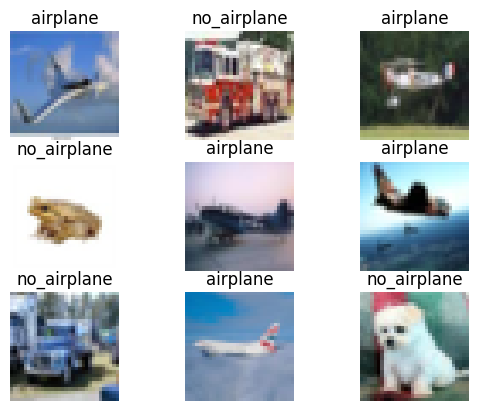

In [ ]:
import torch
import pandas as pd
import os
from torchvision import transforms
from PIL import Image

class AirplaneDataset(torch.utils.data.Dataset): ## make custom dataset
  def __init__(self, annotation_path ,root_dir = '/dataset'): # root_dir : The parent directory path of the train and test directories.
        'Initialization'
        self.data_annotation = pd.read_csv(os.path.join(annotation_path))
        self.data_path = self.data_annotation['filename']
        self.labels = self.data_annotation['label']
        self.root_dir = root_dir
        self.to_tensor = transforms.ToTensor()

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.data_path)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        file_path = os.path.join(self.root_dir,self.data_path[index])
        input_image = Image.open(file_path)
        X = self.to_tensor(input_image)

        # Load data and get label
        y = torch.tensor(self.labels[index]).float()

        return X, y


## make by using custom dataset class
trainset = AirplaneDataset(annotation_path = '/dataset/train_annotation.csv')
testset = AirplaneDataset(annotation_path = '/dataset/test_annotation.csv')

print("0th image data shape: ", trainset[0][0].shape) ## 0th image data
print("0th label : ", trainset[0][1]) ## label

# visualize
class_names=['no_airplane','airplane']
for i in range(9):
  random_index = random.randint(1,10000)
  image, label = trainset[random_index]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image.permute(1,2,0).numpy())
  plt.title(class_names[int(label)])
  plt.axis("off")

Then, re-define the NN model for Airplane/Non-airplane dataset

In [ ]:
# MLP model

In [ ]:
## parameters
epoch = 10
batchsize = 8
lr = 0.01 # learning rate
weight_decay = 1e-3

## dataloader
train_loader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batchsize,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(testset,
                                          batch_size=1,
                                          shuffle=True)

## make model and using GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleMLP().to(device)

## optimizer setting
optimizer = torch.optim.SGD(model.parameters(),
                            lr=lr,
                            weight_decay = weight_decay) # Stochastic Gradient Decent

## loss function
criterion = torch.nn.BCELoss() # Binary Cross Entropy

Finally, let's train and test functions and train the model.


In [ ]:
def train(model, optimizer, train_loader, epoch):
  train_loss = []
  train_accuracy = []
  model.train()

  for i, (X,y) in enumerate(train_loader):
      X,y = X.to(device), y.to(device).view(-1,1)
      optimizer.zero_grad()
      predict = model(X)
      loss = criterion(predict, y)
      loss.backward()
      optimizer.step()

      accuracy = torch.count_nonzero((predict>=0.5) == y)/X.shape[0]
      train_accuracy.append(accuracy)
      train_loss.append(loss)

  avg_loss = sum(train_loss) /len(train_loss)
  avg_accuracy = sum(train_accuracy) / len(train_accuracy)

  print(f'epoch {epoch}) train loss : {avg_loss:.4f} / train_accuracy : {avg_accuracy:.4f}')
  return train_loss, train_accuracy

def test(model, optimizer, test_loader, epoch):
  test_loss = []
  test_accuracy = []
  model.eval()

  for i, (X,y) in enumerate(test_loader):
      with torch.no_grad(): ## Since backward computation is not necessary during test time, turning off grad reduces memory and computational overhead.
        X,y = X.to(device), y.to(device).view(-1,1)
        predict = model(X)
        loss = criterion(predict, y)
        accuracy = torch.count_nonzero((predict>=0.5) == y)
        test_accuracy.append(accuracy)
        test_loss.append(loss)

  avg_loss = sum(test_loss) /len(test_loss)
  avg_accuracy = sum(test_accuracy) / len(test_accuracy)

  print(f'epoch {epoch}) test loss : {avg_loss:.4f} / test_accuracy : {avg_accuracy:.4f}')
  return test_loss, test_accuracy


for i in range(epoch):
  train_loss, train_accuracy = train(model, optimizer, train_loader, i)
  test_loss, test_accuracy =  test(model, optimizer, test_loader, i)


epoch 0) train loss : 0.5809 / train_accuracy : 0.7003
epoch 0) test loss : 0.5305 / test_accuracy : 0.7465
epoch 1) train loss : 0.5271 / train_accuracy : 0.7409
epoch 1) test loss : 0.4965 / test_accuracy : 0.7695
epoch 2) train loss : 0.5107 / train_accuracy : 0.7528
epoch 2) test loss : 0.4817 / test_accuracy : 0.7795
epoch 3) train loss : 0.4974 / train_accuracy : 0.7663
epoch 3) test loss : 0.4806 / test_accuracy : 0.7790
epoch 4) train loss : 0.4869 / train_accuracy : 0.7666
epoch 4) test loss : 0.4612 / test_accuracy : 0.7920
epoch 5) train loss : 0.4771 / train_accuracy : 0.7740
epoch 5) test loss : 0.4784 / test_accuracy : 0.7725
epoch 6) train loss : 0.4729 / train_accuracy : 0.7748
epoch 6) test loss : 0.4559 / test_accuracy : 0.7915
epoch 7) train loss : 0.4627 / train_accuracy : 0.7833
epoch 7) test loss : 0.4466 / test_accuracy : 0.7960
epoch 8) train loss : 0.4545 / train_accuracy : 0.7922
epoch 8) test loss : 0.4861 / test_accuracy : 0.7640
epoch 9) train loss : 0.4485